In [1]:
import json
from utils import *
from run import run_, DEFAULT_ARGS
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def plot_(data, title):

    iterations_info = [i["iterations"] for i in data if i["iterations"] != 10000]

    iterations_mean = np.mean(iterations_info)
    rounded_mean = round(iterations_mean, 2)

    iterations_std = np.std(iterations_info)
    rounded_std = round(iterations_std, 2)

#plot iterations, mean and std
    plt.figure(figsize=(8, 8))
    plt.title("Iterations info" + title)
    plt.xlabel("Run")
    plt.ylabel("Iterations")

    plt.plot(iterations_info)
    for i in range(len(iterations_info)):
        plt.text(i, iterations_info[i], str(iterations_info[i]), ha='center', va='bottom', color='black', alpha=0.5, fontsize=9)

#put mean and std at the begin of the plot
    plt.axhline(y=rounded_mean, color='r', linestyle='--')
    plt.text(-2.5, rounded_mean, str(rounded_mean), ha='right', va='bottom', color='red', fontsize=9)
    plt.axhline(y=rounded_std, color='g', linestyle='--')
    plt.text(-2.5, rounded_std, str(rounded_std), ha='right', va='bottom', color='green', fontsize=9)
    plt.legend(['Iterations', 'Mean', 'Std'], loc='upper left')

    plt.show()

## 2

    last_population = [i["last_population_fitness"] for i in data]

    mean_last_population = []
    aux = []
    for run in data:
        mean_last_population.append(np.mean(run["last_population_fitness"]))
        aux.append(run["found_solution"])
        
    mean = np.mean(mean_last_population)
    std = np.std(mean_last_population)
         
    plt.figure(figsize=(20, 8))
    plt.title("Mean last population x Run" + title)
    plt.xlabel("Run")
    plt.ylabel("Mean Fitness of the last population")
    plt.ylim(21, 28)

    colors = ['red' if i == False else 'green' for i in aux]
    plt.bar(range(len(mean_last_population)), mean_last_population, align='center', color=colors)

    for i in range(len(mean_last_population)):
        plt.text(i, mean_last_population[i], str(mean_last_population[i]), ha='center', va='bottom', color='black', fontsize=11)
        
    plt.axhline(y=mean, color='b', linestyle='--')
    plt.text(0, mean, "Mean: " + str(round(mean, 2)), ha='right', va='bottom', color='blue')

    plt.text(0, 27.6, "Std: " + str(round(std, 2)), ha='right', va='bottom', color='blue')

    plt.show()

# min

    datas = []
    solutions = [i for i in data if i["found_solution"]]
# datas.append(max(solutions, key=lambda x: x["iterations"]))
    datas.append(min(solutions, key=lambda x: x["iterations"] if x["iterations"] > 18 else 100000))

    cmap = plt.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, 30))

    plt.figure(figsize=(10, 5))
    plt.title("Mean fitness x Iteration" + title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Fitness")
    plt.grid(True)

    for i in range(len(datas)):
       mean_per_iteration = datas[i]["mean_per_iteration"]
       best_per_iteration = datas[i]["best_per_iteration"]
       plt.plot(best_per_iteration, color='red')
       plt.plot(mean_per_iteration, color='green')

    plt.show()

# max

    datas = []
    solutions = [i for i in data if i["found_solution"]]
# datas.append(max(solutions, key=lambda x: x["iterations"]))
    datas.append(max(solutions, key=lambda x: x["iterations"] if x["iterations"] != 10000 else 0))
    cmap = plt.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, 30))

    plt.figure(figsize=(10, 5))
    plt.title("Mean fitness x Iteration" + title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Fitness")
    plt.grid(True)

    for i in range(len(datas)):
       mean_per_iteration = datas[i]["mean_per_iteration"]
       best_per_iteration = datas[i]["best_per_iteration"]
       plt.plot(best_per_iteration, color='red')
       plt.plot(mean_per_iteration, color='green')

    plt.show()






In [2]:
i = 1
filename_ = "2parte_" + str(i)
args_1 = {"dna_size": 8,
          "genotipe_size": 3,
                "population_size": 100,
                "gene_set": "01",
                "max_iterations": -1,
                "parent_method": "tournament",
                "survivor_method": "best",
                "recombination_method": "pmx",
                "recombination_probability": 0.9,
                "mutation_method": "insertion",
                "mutation_probability": 0.4,
                "pair_children_size": 8
        }

run_(args_1, filename=filename_, n_runs=30)
display(args_1)

with open(filename_ + '.json', 'r') as f:
    data1 = json.load(f)

'30 solutions of 30 were found in 4.0 seconds'

{'dna_size': 8,
 'genotipe_size': 3,
 'population_size': 100,
 'gene_set': '01',
 'max_iterations': -1,
 'parent_method': 'tournament',
 'survivor_method': 'best',
 'recombination_method': 'pmx',
 'recombination_probability': 0.9,
 'mutation_method': 'insertion',
 'mutation_probability': 0.4,
 'pair_children_size': 8}

In [216]:
i = 2
filename_ = "2parte_" + str(i)
args_2 = {"dna_size": 8,
          "genotipe_size": 3,
                "population_size": 100,
                "gene_set": "01",
                "max_iterations": 10000,
                "parent_method": "tournament",
                "survivor_method": "best",
                "recombination_method": "pmx",
                "recombination_probability": 0.9,
                "mutation_method": "insertion",
                "mutation_probability": 0.4,
                "pair_children_size": 2
        }

run_(args_2, filename=filename_, n_runs=30)
display(args_2)

with open(filename_ + '.json', 'r') as f:
    data2 = json.load(f)

'30 solutions of 30 were found in 2.08 seconds'

{'dna_size': 8,
 'genotipe_size': 3,
 'population_size': 100,
 'gene_set': '01',
 'max_iterations': 10000,
 'parent_method': 'tournament',
 'survivor_method': 'best',
 'recombination_method': 'pmx',
 'recombination_probability': 0.9,
 'mutation_method': 'insertion',
 'mutation_probability': 0.4,
 'pair_children_size': 2}

In [217]:
i = 3
filename_ = "3parte_" + str(i)
args_3 = {"dna_size": 8,
          "genotipe_size": 3,
                "population_size": 100,
                "gene_set": "01",
                "max_iterations": 10000,
                "parent_method": "tournament",
                "survivor_method": "best",
                "recombination_method": "pmx",
                "recombination_probability": 0.9,
                "mutation_method": "insertion",
                "mutation_probability": 0.4,
                "pair_children_size": 3
        }

run_(args_3, filename=filename_, n_runs=30)
display(args_3)

with open(filename_ + '.json', 'r') as f:
    data3 = json.load(f)

'30 solutions of 30 were found in 1.84 seconds'

{'dna_size': 8,
 'genotipe_size': 3,
 'population_size': 100,
 'gene_set': '01',
 'max_iterations': 10000,
 'parent_method': 'tournament',
 'survivor_method': 'best',
 'recombination_method': 'pmx',
 'recombination_probability': 0.9,
 'mutation_method': 'insertion',
 'mutation_probability': 0.4,
 'pair_children_size': 3}

In [222]:
i = 4
filename_ = "3parte_" + str(i)
args_4 = {"dna_size": 8,
          "genotipe_size": 3,
                "population_size": 100,
                "gene_set": "01",
                "max_iterations": 10000,
                "parent_method": "tournament",
                "survivor_method": "best",
                "recombination_method": "pmx",
                "recombination_probability": 0.9,
                "mutation_method": "insertion",
                "mutation_probability": 0.4,
                "pair_children_size": 3
        }

run_(args_4, filename=filename_, n_runs=30)
display(args_4)

with open(filename_ + '.json', 'r') as f:
    data4 = json.load(f)

'29 solutions of 30 were found in 15.17 seconds'

{'dna_size': 8,
 'genotipe_size': 3,
 'population_size': 100,
 'gene_set': '01',
 'max_iterations': 10000,
 'parent_method': 'tournament',
 'survivor_method': 'best',
 'recombination_method': 'pmx',
 'recombination_probability': 0.9,
 'mutation_method': 'insertion',
 'mutation_probability': 0.4,
 'pair_children_size': 3}

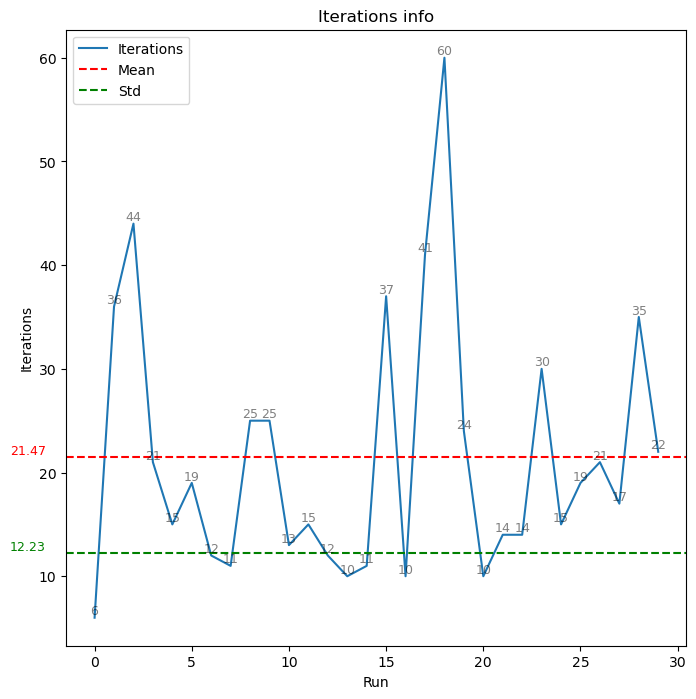

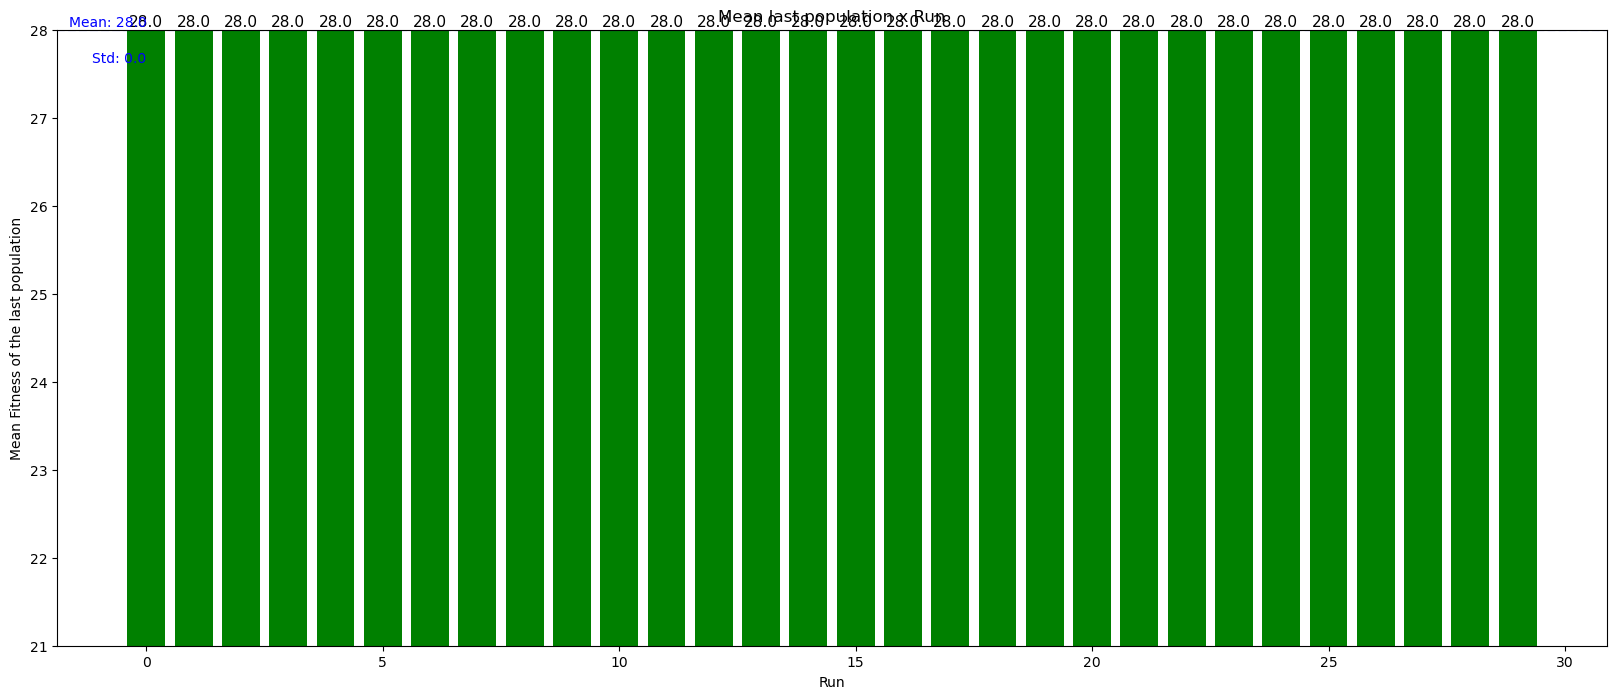

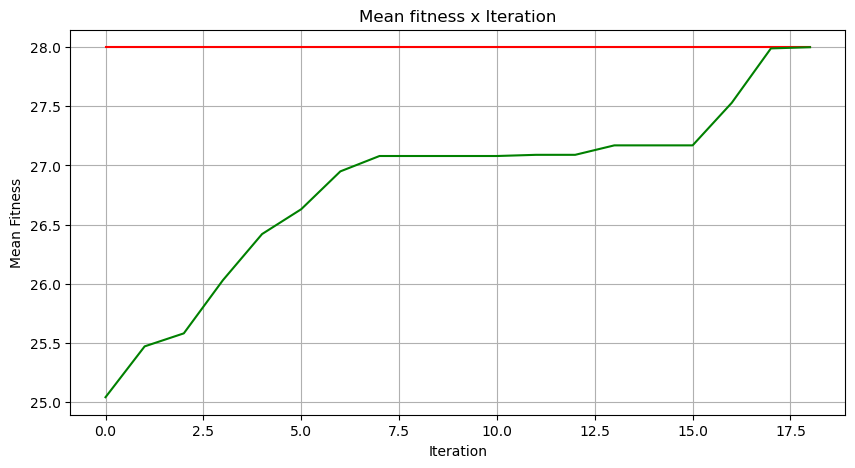

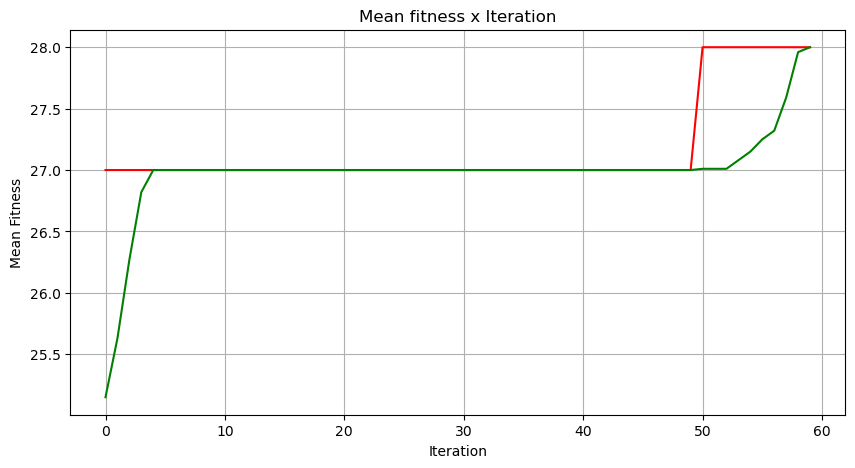

In [9]:
plot_(data1, "")

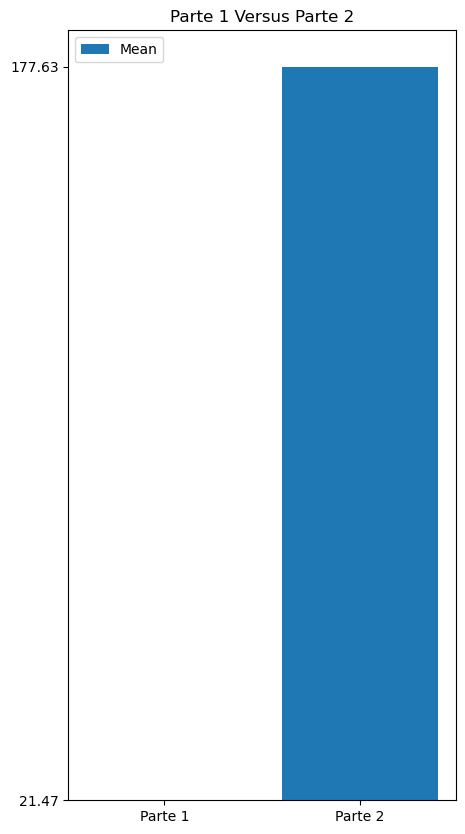

In [17]:
def retInfo(data):
    iterations_info = [i["iterations"] for i in data if i["iterations"] != 10000]

    iterations_mean = np.mean(iterations_info)
    rounded_mean = round(iterations_mean, 2)

    iterations_std = np.std(iterations_info)
    rounded_std = round(iterations_std, 2)

    return rounded_mean, rounded_std

# x = ["2", "4", "6", "8"]

# info = [retInfo(data1), retInfo(data2), retInfo(data3), retInfo(data4)]
# y1 = [info[0][0], info[1][0], info[2][0], info[3][0]]
# y2 = [info[0][1], info[1][1], info[2][1], info[3][1]]
x = ["Parte 1", "Parte 2"]
y1 = ["21.47", "177.63"]
y = [i for i in range(0,200)]

plt.figure(figsize=(5, 10))
plt.title("Parte 1 Versus Parte 2")
plt.bar(x, y1)
# plt.bar(x, y2, alpha=0.1)
plt.legend(["Mean", "Std"], loc='upper left')
plt.show()


In [5]:
plot_(data2, "")

NameError: name 'plot_' is not defined

/tmp/ipykernel_109222/461840567.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('red')
/tmp/ipykernel_109222/461840567.py:50: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('green')
/tmp/ipykernel_109222/461840567.py:51: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[2].set_color('blue')
/tmp/ipykernel_109222/461840567.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[3].set_color('yellow')


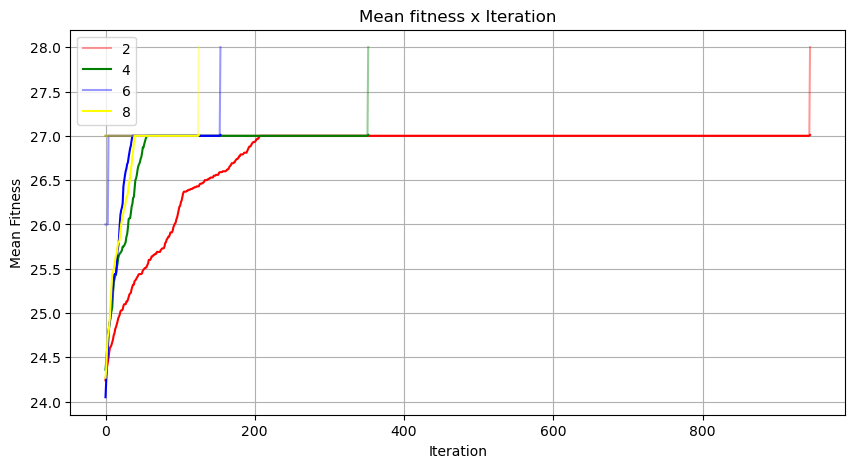

In [231]:
def retInfo2(data, mm):
    datas = []
    solutions = [i for i in data if i["found_solution"]]
# datas.append(max(solutions, key=lambda x: x["iterations"]))
    if mm == 1: datas.append(min(solutions, key=lambda x: x["iterations"] if x["iterations"] > 18 else 100000))
    else: datas.append(max(solutions, key=lambda x: x["iterations"] if x["iterations"] != 10000 else 0))

    return datas


cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, 30))

plt.figure(figsize=(10, 5))
plt.title("Mean fitness x Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Fitness")
plt.grid(True)

datas1 = retInfo2(data1, 0)
datas2 = retInfo2(data2, 0)
datas3 = retInfo2(data3, 0)
datas4 = retInfo2(data4, 0)

for i in range(len(datas1)):
   mean_per_iteration = datas1[i]["mean_per_iteration"]
   best_per_iteration = datas1[i]["best_per_iteration"]
   plt.plot(best_per_iteration, color='red', alpha=0.4)
   plt.plot(mean_per_iteration, color='red', alpha=1)
for i in range(len(datas2)):
   mean_per_iteration = datas2[i]["mean_per_iteration"]
   best_per_iteration = datas2[i]["best_per_iteration"]
   plt.plot(best_per_iteration, color='green', alpha=0.4)
   plt.plot(mean_per_iteration, color='green', alpha=1)
for i in range(len(datas3)):
   mean_per_iteration = datas3[i]["mean_per_iteration"]
   best_per_iteration = datas3[i]["best_per_iteration"]
   plt.plot(best_per_iteration, color='blue', alpha=0.4)
   plt.plot(mean_per_iteration, color='blue', alpha=1)
for i in range(len(datas4)):
   mean_per_iteration = datas4[i]["mean_per_iteration"]
   best_per_iteration = datas4[i]["best_per_iteration"]
   plt.plot(best_per_iteration, color='yellow', alpha=0.4)
   plt.plot(mean_per_iteration, color='yellow', alpha=1)

plt.legend(["2", "4", "6", "8"], loc='upper left')
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('blue')
leg.legendHandles[3].set_color('yellow')

plt.show()
